In [8]:
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#membaca input
iris=datasets.load_iris()
features=iris.data[:100, :2]
target=iris.target[:100]

#Standard Fitur
scaler=StandardScaler()
features_standardized=scaler.fit_transform(features)

#data training
x_train,x_test,y_train,y_test=train_test_split(features_standardized, target, test_size=0.2)

#membuat model
model=LinearSVC(C=1.0)
model=model.fit(x_train,y_train)
#prediki
y_pred=model.predict(x_test)
#evaluasi kerja SVM
print('Accucar: {:.2f}'.format(model.score(x_test, y_test)))
confusion_matrix=confusion_matrix(y_test,y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))


Accucar: 0.95
[[11  1]
 [ 0  8]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.89      1.00      0.94         8

    accuracy                           0.95        20
   macro avg       0.94      0.96      0.95        20
weighted avg       0.96      0.95      0.95        20



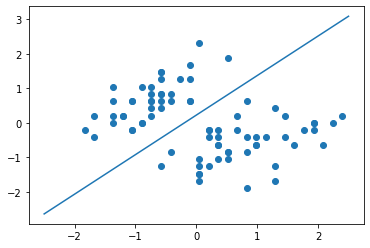

In [18]:
#Menampilkan data
color=["red" if c==0 else "blue" for c in target]
plt.scatter(x_train[:,0],x_train[:,1])
w=model.coef_[0]
a=-w[0]/w[1]

#menampilkan hyperplane
xx=np.linspace(-2.5, 2.5)
yy=a*xx-(model.intercept_[0])/w[1]
plt.plot (xx, yy)
#plt.axis("off")
plt.show()